# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations
- The temperatures reach a peak at 0deg Lat and are lowest at the higest positive latitudes and highest negative latitudes
- The average humidity is highest in regions between Lat -20 to Lat 0
- Cloud cover and wind velocities do not have an obvious correlation to lattitude
- These observations are fairly incomplete around the lowest lattitudes due to an apparent undersampling of weather data


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [5]:
# view the list of cities to QC
#cities

In [6]:
# weather API definition. Define the URL for use throughout the remainder of code
url = "http://api.openweathermap.org/data/2.5/weather"


In [7]:
#Get a Look at whats in the data in order to format the subsequent loops and functions
city_test = {"appid": "5865551bfdc2ede032ee45ed103bf041","q": "Austin"}
response = requests.get(url, params = city_test)
response.json()

{'coord': {'lon': -97.74, 'lat': 30.27},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 295.94,
  'feels_like': 293.48,
  'temp_min': 294.26,
  'temp_max': 297.15,
  'pressure': 1018,
  'humidity': 33},
 'visibility': 16093,
 'wind': {'speed': 2.1},
 'clouds': {'all': 1},
 'dt': 1578349800,
 'sys': {'type': 1,
  'id': 3344,
  'country': 'US',
  'sunrise': 1578317292,
  'sunset': 1578354281},
 'timezone': -21600,
 'id': 4671654,
 'name': 'Austin',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
def city_func(cityname):
    all_cities = {"appid": "5865551bfdc2ede032ee45ed103bf041","q": cityname,"units":"metric"}
    json_data = requests.get(url, params=all_cities).json()
    name = json_data.get("name")
    temp = json_data.get('main').get('temp')
    humid = json_data.get('main').get('humidity')
    clouds = json_data.get('clouds').get('all')
    wind = json_data.get('wind').get('speed')
    lat = json_data.get("coord").get('lat')
    long = json_data.get("coord").get('lon')

    return { "City" : name, "temp": temp,"Lat": lat,"Long": long,"humidity": humid,"Cloud Cover": clouds,"Wind Speed": wind}

# we will create a list for the extracted city information. As the for loop loops through the city names from 
# cities it will match city name with name from weather api

# count the api calls and define empty list to store city information
city_data_ls = []
z = 1

# this loop will loop through the city data. It will run through the city names in the cities list 
# then pass that city name through the function defined above at whch point the try except loop will pass if the names match or print wrong city if they dont
# the function will collect all the data define above for each passing city then store it in the final dataframe for plotting

for city in cities:
    print('city # ' + str(z) + ' ' + str((len(cities))) + ' ' + city)
    z = z + 1
    
    try:
        city_data_ls.append(city_func(city))
    except:
        print('wrong city')
        
#print(city_data_ls)
# Take data and place into dataframe and set our index to the name of the City
final_DF = pd.DataFrame(city_data_ls).set_index('City')

city # 1 600 camana
wrong city
city # 2 600 provideniya
city # 3 600 lloydminster
city # 4 600 albany
city # 5 600 tasiilaq
city # 6 600 tual
city # 7 600 saskylakh
city # 8 600 faanui
city # 9 600 sigli
city # 10 600 san patricio
city # 11 600 phan thiet
city # 12 600 norman wells
city # 13 600 yunjinghong
wrong city
city # 14 600 aswan
city # 15 600 kahului
city # 16 600 severnoye
city # 17 600 rivadavia
city # 18 600 pevek
city # 19 600 berlevag
city # 20 600 lavrentiya
city # 21 600 vallenar
city # 22 600 kavieng
city # 23 600 hilo
city # 24 600 saint-philippe
city # 25 600 new norfolk
city # 26 600 punta arenas
city # 27 600 bredasdorp
city # 28 600 opuwo
city # 29 600 kirakira
city # 30 600 khatanga
city # 31 600 bar
city # 32 600 aitape
city # 33 600 illoqqortoormiut
wrong city
city # 34 600 coihaique
city # 35 600 atuona
city # 36 600 butembo
city # 37 600 vaini
city # 38 600 rikitea
city # 39 600 attawapiskat
wrong city
city # 40 600 souillac
city # 41 600 narsaq
city # 42 600

In [9]:
final_DF.head()

,temp,Lat,Long,humidity,Cloud Cover,Wind Speed
City,,,,,,
Provideniya,-24.02,64.42,-173.23,95,83,0.55
Lloydminster,-13.00,53.28,-110.01,60,20,3.60
Albany,0.49,42.65,-73.75,55,40,3.60
Tasiilaq,-5.79,65.61,-37.64,93,100,14.70
Tual,28.12,-5.67,132.75,77,100,4.89


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

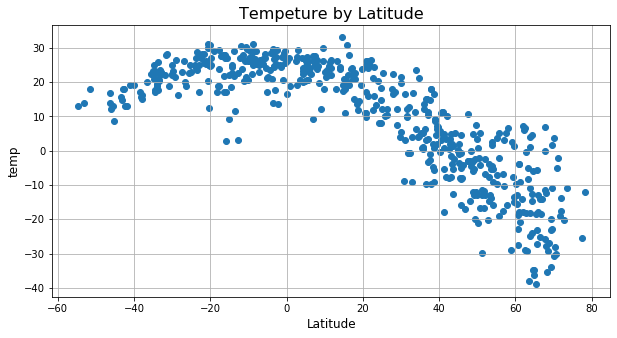

In [10]:
plt.figure(figsize = (10, 5))
plt.scatter(x = final_DF['Lat'], y = final_DF['temp'])
plt.grid(True)
plt.title('Tempeture by Latitude', fontsize = 16)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('temp', fontsize = 12)
plt.savefig('Temp.png')

plt.show()

#### Latitude vs. Humidity Plot

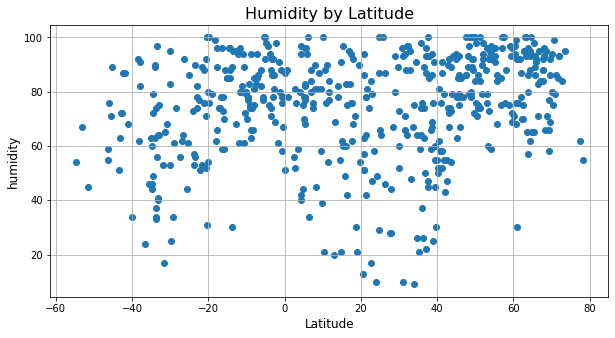

In [11]:
plt.figure(figsize = (10, 5))
plt.scatter(x = final_DF['Lat'], y = final_DF['humidity'])
plt.grid(True)
plt.title('Humidity by Latitude', fontsize = 16)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('humidity', fontsize = 12)
plt.savefig('humid.png')

plt.show()

#### Latitude vs. Cloudiness Plot

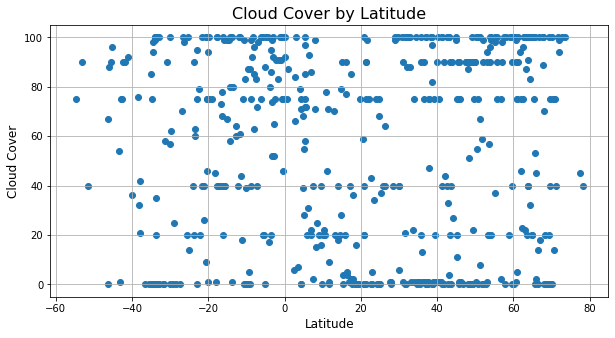

In [12]:
#Plot by windspeed
plt.figure(figsize = (10, 5))
plt.scatter(x = final_DF['Lat'], y = final_DF['Cloud Cover'])
plt.grid(True)
plt.title('Cloud Cover by Latitude', fontsize = 16)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloud Cover', fontsize = 12)

plt.savefig('Clouds.png')

plt.show()

#### Latitude vs. Wind Speed Plot

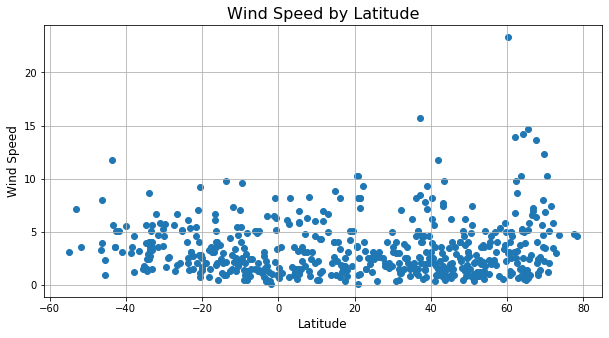

In [13]:
#Plot by windspeed
plt.figure(figsize = (10, 5))
plt.scatter(x = final_DF['Lat'], y = final_DF['Wind Speed'])
plt.grid(True)
plt.title('Wind Speed by Latitude', fontsize = 16)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed', fontsize = 12)
plt.savefig('Wind.png')

plt.show()

In [22]:
final_DF.to_csv(r'C:\Users\samms\Desktop\python_API_challenge\Instructions\starter_code\cities_output_file.csv')